# BDAT 1004 DATA PROGRAMMING

QUESTION 1

In [277]:
# step 1
import pandas as pd
import numpy as np

In [5]:
# step 2 Import dataset from URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [6]:
# step 3 Assign it to a variable called user
users = pd.read_csv(url,sep= '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
# step 4 dicover the mean age per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [196]:
# step 5 discover the male ratio and sort it from most to least
male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean()).sort_values(ascending=False)
print("\nMale Ratio per Occupation (Sorted):\n", male_ratio_per_occupation)


Male Ratio per Occupation (Sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [26]:
# step 6 Minimum and Maximum Age for each Occupation
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [37]:
#step 7 Mean age for each combination of occupation and sex
Mean_age = pd.pivot_table(users, index=['occupation'], columns=['gender'], values='age', aggfunc={'age': np.mean}).fillna(0)

Mean_age

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [39]:
#step 8 Percentage of male and female in each occupation
Percentage = users.pivot_table(index='occupation',  columns = "gender" ,values = 'age',   aggfunc='count' , fill_value=0)

Percentage['%male'] = (Percentage['M']/(Percentage['F']+ Percentage['M'])*100)

Percentage['%female'] = (Percentage['F']/(Percentage['F']+ Percentage['M'])*100)

Percentage.iloc[:,[2,3]]

gender,%male,%female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


QUESTION 2

In [40]:
#step 1 import libraries
import pandas as pd
import numpy as np

In [42]:
#step 2&3 Import the dataset from url and assign it to a variable euro12
euro12= pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [45]:
# step 4 select only the goal column
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [48]:
# step 5 how many teams participated in EURO2021?
teams = euro12.Team.count()
print('Number of teams participated in Euro 2021 is {}'.format(teams))

Number of teams participated in Euro 2021 is 16


In [49]:
# step 6 number of columns in dataset
len(euro12.columns)

35

In [59]:
#Step 7 View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [77]:
#step 8 sort teams by red cards, then by yellow cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [86]:
# Step 9: Calculate the mean Yellow Cards given per Team
euro12.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [87]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [88]:
#Step 11. Select the teams that start with G
euro12[euro12['Team'].str.contains('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [89]:
#Step 12. Select the first 7 columns
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [90]:
#Step 13. Select all columns except the last 3
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [97]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


QUESTION 3 Housing

In [98]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [201]:
# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 4, size=100))
series2 = pd.Series(np.random.randint(1, 3, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
series1,  series2,  series3

(0     3
 1     1
 2     1
 3     3
 4     3
      ..
 95    2
 96    3
 97    1
 98    1
 99    2
 Length: 100, dtype: int32,
 0     1
 1     1
 2     2
 3     2
 4     2
      ..
 95    2
 96    2
 97    2
 98    2
 99    2
 Length: 100, dtype: int32,
 0     14717
 1     22539
 2     16372
 3     24124
 4     10652
       ...  
 95    12649
 96    10538
 97    20983
 98    26940
 99    26701
 Length: 100, dtype: int32)

In [103]:
#Step 3. Create a DataFrame by joinning the Series by column
df = pd.DataFrame({'series1':series1,'series2':series2,'series3':series3})
df.head(10)

,series1,series2,series3
0,2,2,21908
1,1,2,29742
2,2,1,14913
3,1,1,25581
4,3,2,18661
5,1,1,16430
6,3,1,28222
7,3,2,28646
8,2,2,24345
9,2,2,29593


In [105]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
new_df=df.rename(columns={'series1':'beds','series2':'bathrs', 'series3':'price_sqr_meter'})
new_df.head()

,beds,bathrs,price_sqr_meter
0,2,2,21908
1,1,2,29742
2,2,1,14913
3,1,1,25581
4,3,2,18661


In [108]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))
bigcolumn

,0
0,2
1,1
2,2
3,1
4,3
...,...
95,23606
96,12394
97,14811
98,28239


In [110]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

In [111]:
# Yes

In [113]:
if (max(bigcolumn.index)==99):
    print('True')
else:
    print('False')


True


In [115]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,0
0,2
1,1
2,2
3,1
4,3
...,...
295,23606
296,12394
297,14811
298,28239


QUESTION 4

In [265]:
#step 1 import necessary libraries
import pandas as pd

In [237]:
# Step 2: Import the Dataset
data = pd.read_csv('wind.txt', delim_whitespace=True)
print("Imported Dataset:\n", data.head())


Step 2: Imported Dataset:
    Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [238]:
# Step 3: Replace the First 3 Columns by a Datetime Index
data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}, inplace=True)
data['year'] = ['19%i' % i for i in data['year']]
combinedate = pd.to_datetime(data[['year', 'month', 'day']])
data.insert(loc=0, column='date', value=combinedate)
data = data.drop(columns=['year', 'month', 'day'])
print("Dataset with Datetime Index:\n", data.head())


Dataset with Datetime Index:
         date    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0 1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1 1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2 1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3 1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4 1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [276]:
# Step 4: Function to Fix the Year
def fix_year(year):
    if year > 1989:
        return year - 100
    else:
        return year

data.index = data.index.to_series().apply(lambda x: x.replace(year=fix_year(x.year)))
print("Step 4: Fixed Year in Dataset:\n", data.head())

Step 4: Fixed Year in Dataset:
               RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


In [274]:
# Step 5: Set the Right Dates as the Index
data.dtypes

RPT    float64
VAL    float64
ROS    float64
KIL    float64
SHA    float64
BIR    float64
DUB    float64
CLA    float64
MUL    float64
CLO    float64
BEL    float64
MAL    float64
dtype: object

In [256]:
# Step 6: Calculate Missing Values
missing_values = data.isnull().sum()
print("Missing Values for Each Location:\n", missing_values)


Missing Values for Each Location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [254]:
# Step 7: Calculate Non-Missing Values
non_missing_count = data.count().sum()
print("Total Non-Missing Values:", non_missing_count)


Total Non-Missing Values: 78857


In [255]:
# Step 8: Calculate Mean Windspeeds
mean_windspeed = data.mean().mean()
print("Mean Windspeeds:", mean_windspeed)


Mean Windspeeds: 10.227982360836938


In [253]:
# Step 9: Calculate Location Statistics
loc_stats = data.aggregate(['min', 'max', 'mean', 'std'])
print("Location Statistics:\n", loc_stats)



Location Statistics:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [252]:
# Step 10: Calculate Day Statistics
day_stats = data.resample('D').aggregate(['min', 'max', 'mean', 'std'])
print("Day Statistics:\n", day_stats)


Day Statistics:
               RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04  14.

In [251]:
# Step 11: Average Windspeed in January for Each Location
january_avg = data[data.index.month == 1].mean()
print("Average Windspeed in January for Each Location:\n", january_avg)



Average Windspeed in January for Each Location:
 RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [250]:
# Step 12: Downsample to Yearly Frequency
yearly_data = data.resample('Y').mean()
print("Yearly Frequency Data:\n", yearly_data)


Yearly Frequency Data:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088

In [249]:
# Step 13: Downsample to Monthly Frequency
monthly_data = data.resample('M').mean()
print("Monthly Frequency Data:\n", monthly_data)


Monthly Frequency Data:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.7

In [261]:
# Step 14: Downsample to Weekly Frequency
weekly_data = data.resample('W').mean()
print("Weekly Frequency Data:\n", weekly_data)


Weekly Frequency Data:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.9

In [263]:
# Step 15: Weekly Statistics for First 52 Weeks
weekly_stats = weekly_data[:52].aggregate(['min', 'max', 'mean', 'std'])
print("Weekly Statistics for First 52 Weeks:\n", weekly_stats)


Weekly Statistics for First 52 Weeks:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    4.202857   4.255714   6.738571   3.300000   6.112857   2.715714   
max   19.880000  16.417143  18.225714  12.720000  17.432857  14.828571   
mean  12.316163  10.436978  11.296667   6.998690  10.930691   7.810330   
std    3.419077   2.900003   2.789210   2.091987   2.674869   2.426344   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    3.964286   4.257143   4.501429   6.031429   5.875714   5.737143  
max   15.565714  15.160000  14.480000  16.461429  21.832857  23.641429  
mean   9.764986   8.908732   8.732106   9.914712  13.658352  13.723933  
std    2.850023   2.447832   2.412421   2.595592   3.640914   3.583555  


QUESTION 5

In [116]:
#Step 1: Import the necessary libraries
import pandas as pd
import numpy as np


In [119]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
#Step 4. See the first 10 entries

chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t',lineterminator='\n')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [120]:
#Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [122]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [123]:
#Step 7. Print the name of all the columns.
for column_name in chipo.columns:
    print(column_name)

order_id
quantity
item_name
choice_description
item_price


In [124]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [126]:
#Step 9. Which was the most-ordered item?

most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item

'Chicken Bowl'

In [128]:
#Step 10. For the most-ordered item, how many items were ordered?
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_item_quantity

761

In [133]:
# Step 11: What was the most ordered item in the choice_description column?
choice_description_counts = chipo['choice_description'].value_counts()
most_ordered = choice_description_counts.idxmax()
most_ordered_count = choice_description_counts.max()
most_ordered, most_ordered_count


('[Diet Coke]', 134)

In [134]:
#Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [136]:
#Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
chipoA = chipo.copy()
chipoA['item_price'] = chipoA['item_price'].str[1:]
chipoA.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [137]:
chipoB = chipo.copy()
chipoB['item_price'] = chipoB['item_price'].apply(lambda x: float(x[1:]))
chipoB.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [139]:
#Step 14. How much was the revenue for the period in the dataset?
(chipo.quantity * item_price).sum()

39237.02

In [140]:
#Step 15. How many orders were made in the period?
chipo['order_id'].nunique()

1834

In [142]:
#Step 16. What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * item_price
avg_per_order = chipo.groupby(by=['order_id']).sum()
avg_per_order['revenue'].mean()

C:\Users\sethi\AppData\Local\Temp\ipykernel_30980\2327469772.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_per_order = chipo.groupby(by=['order_id']).sum()


21.39423118865867

In [145]:
#Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

QUESTION 6 

In [146]:
#Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!


In [162]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv(r'C:\Users\sethi\Downloads\us-marriages-divorces-1867-2014.csv')
data



,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


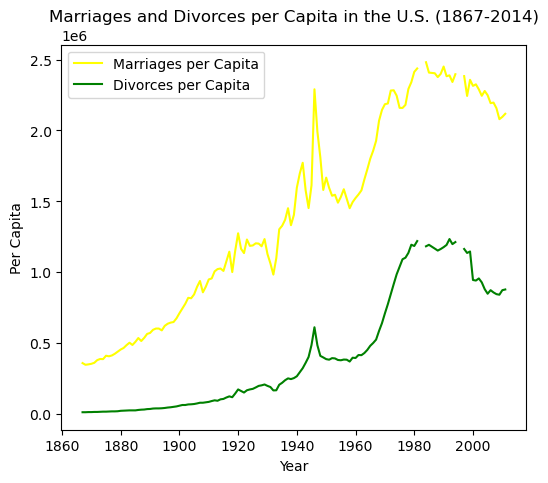

In [219]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv(r'C:\Users\sethi\Downloads\us-marriages-divorces-1867-2014.csv')
years = data['Year']
marriages_per_capita = data['Marriages']  
divorces_per_capita = data['Divorces']    


plt.figure(figsize=(6, 5)) 
plt.plot(years, marriages_per_capita, label='Marriages per Capita', color='yellow')
plt.plot(years, divorces_per_capita, label='Divorces per Capita', color='green')


plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()

plt.show()

QUESTION 7 

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

<Figure size 800x600 with 0 Axes>

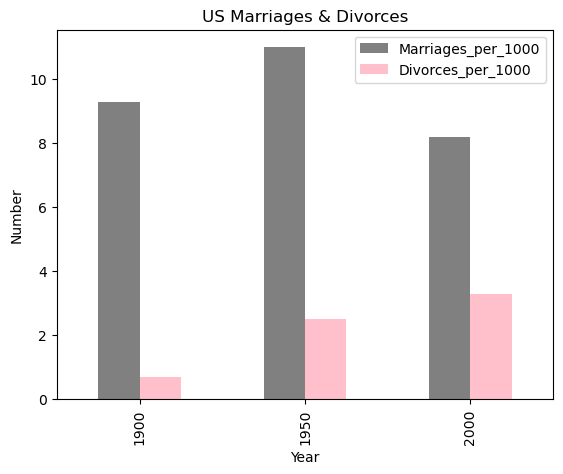

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriage = pd.read_csv(r'C:\Users\sethi\Downloads\us-marriages-divorces-1867-2014.csv')

new_us_marriage = us_marriage[(us_marriage.Year == 1900) | (us_marriage.Year == 1950) | (us_marriage.Year == 2000)]
new_us_marriage = new_us_marriage.drop(columns=['Marriages', 'Divorces', 'Population'])
new_us_marriage = new_us_marriage.set_index('Year')
plt.figure(figsize=(8, 6))
new_us_marriage.plot.bar(color=['grey', 'pink'])  
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('US Marriages & Divorces')
plt.show()



QUESTION 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

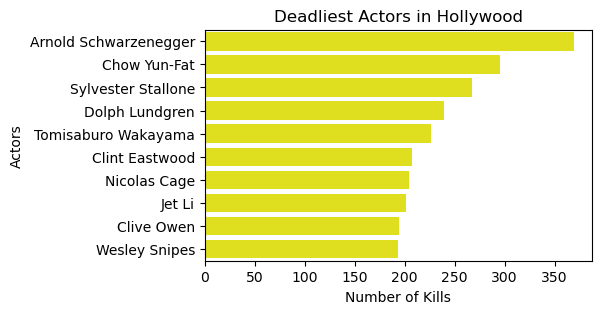

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

actors = pd.read_csv(r'C:\Users\sethi\Downloads\actor_kill_counts.csv')
actors = actors.sort_values(by="Count", ascending=False)
plt.figure(figsize=(5, 3))
sb.barplot(x="Count", y="Actor", data=actors, color="yellow")

plt.ylabel("Actors")
plt.xlabel("Number of Kills")
plt.title("Deadliest Actors in Hollywood")
plt.show()


QUESTION 9 
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

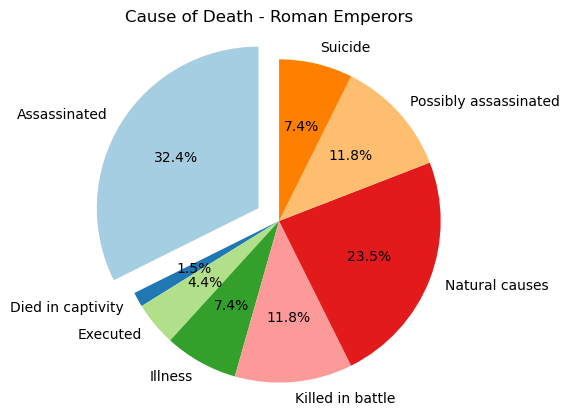

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

roman = pd.read_csv(r'C:\Users\sethi\Downloads\roman-emperor-reigns.csv')
death = roman.groupby('Cause_of_Death').count()[['Emperor']]
emperor = pd.Series(death['Emperor'])
cause = pd.Series(death.index)
explode = (0.15,0,0,0,0,0,0,0)
colors = plt.cm.Paired.colors 
fig, ax = plt.subplots()
ax.pie(emperor, explode=explode, labels=cause, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
ax.axis('equal')

plt.title('Cause of Death - Roman Emperors')
plt.show()



QUESTION 10 

In the following chart, which of the following can we state with confidence?
In this population, people aged more quickly in 2000 than in 1900.
All of the three statements about the chart are correct.
The average age of this population was higher in 2000 than in 190.
None of the three statements about the chart are correct.
There were more people in this population in 2000 than in 1900.



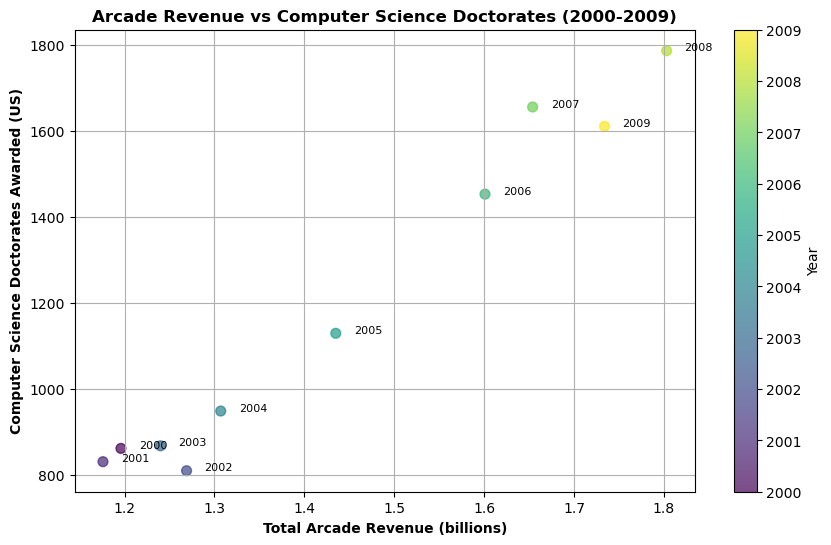

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\sethi\Downloads\arcade-revenue-vs-cs-doctorates.csv') 

years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
doctorates = data['Computer Science Doctorates Awarded (US)']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(revenue, doctorates, c=years, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Year') 
plt.xlabel('Total Arcade Revenue (billions)', fontweight='bold') 
plt.ylabel('Computer Science Doctorates Awarded (US)', fontweight='bold')
plt.title('Arcade Revenue vs Computer Science Doctorates (2000-2009)', fontweight='bold') 

plt.grid(True)
for i, year in enumerate(years):
    plt.text(revenue[i] + 0.02, doctorates[i], str(year), fontsize=8, color='black')

plt.show()